<a href="https://colab.research.google.com/github/Seriphap/Exercise-Titanic-Dataset/blob/main/HW_3_3_ImplementLogisticRegression_6710422002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Implement Logistic Regression (Titanic Dataset)

In [ ]:
# @title
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MyData/titanic_train.csv')

# List of columns to keep
columns_to_keep = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']

# Select the columns from the original DataFrame
df_cleaned = df[columns_to_keep]

# Remove rows where Age is less than or equal to 0 or is NaN (blank data)
df_cleaned = df_cleaned[(df_cleaned['Age'] > 0) & (df_cleaned['Age'].notna())]

# Convert 'Age' column to integers
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

# Remove rows where Fare is 0
df_cleaned = df_cleaned[df_cleaned['Fare'] > 0]

# Remove rows where Embarked is blank or NaN
df_cleaned = df_cleaned[df_cleaned['Embarked'].notna()]

# Encode categorical columns 'Sex' and 'Embarked' using LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['Sex'] = label_encoder.fit_transform(df_cleaned['Sex'])
df_cleaned['Embarked'] = label_encoder.fit_transform(df_cleaned['Embarked'])

# Show the first few rows of the cleaned DataFrame
display(df_cleaned)

# Define features (X) and target (y)
X = df_cleaned[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = df_cleaned['Survived']  # Target variable

# Step 1: Split the data into training and testing sets
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create a Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase iterations if necessary

# Step 3: Train the model
model.fit(X_train_LG, y_train_LG)

# Step 4: Make predictions on the train set
y_predict_train_LG = model.predict(X_train_LG)
print("Classification Report for Training Set:")
print('Predicted train values (Head):', y_predict_train_LG[:10])  # First 10 predicted values
print('Predicted train values (Tail):', y_predict_train_LG[-10:])  # Last 10 predicted values

# Step 5: Evaluate the model's performance (Training Set)
print("Classification Report:")
print(classification_report(y_train_LG, y_predict_train_LG))

accuracy_train_LG = accuracy_score(y_train_LG, y_predict_train_LG)
print(f'Accuracy on Training Set: {accuracy_train_LG * 100:.2f}%')

# Confusion Matrix for Training Set
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_LG, y_predict_train_LG))

# Step 6: Make predictions on the test set
y_predict_test_LG = model.predict(X_test_LG)
print("\nClassification Report for Test Dataset:")
print('Predicted test values (Head):', y_predict_test_LG[:10])  # First 10 predicted values
print('Predicted test values (Tail):', y_predict_test_LG[-10:])  # Last 10 predicted values

# Step 7: Evaluate the model's performance (Test Set)
print("Classification Report (Test Set):")
print(classification_report(y_test_LG, y_predict_test_LG))

accuracy_test_LG = accuracy_score(y_test_LG, y_predict_test_LG)
print(f'Accuracy on Test Set: {accuracy_test_LG * 100:.2f}%')

# Confusion Matrix for Test Set
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_LG, y_predict_test_LG))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22,1,0,7.2500,2,0
1,1,0,38,1,0,71.2833,0,1
2,3,0,26,0,0,7.9250,2,1
3,1,0,35,1,0,53.1000,2,1
4,3,1,35,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
885,3,0,39,0,5,29.1250,1,0
886,2,1,27,0,0,13.0000,2,0
887,1,0,19,0,0,30.0000,2,1
889,1,1,26,0,0,30.0000,0,1


Classification Report for Training Set:
Predicted train values (Head): [1 0 0 1 0 0 1 1 0 0]
Predicted train values (Tail): [1 0 1 1 1 0 0 0 1 0]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       333
           1       0.77      0.72      0.74       231

    accuracy                           0.80       564
   macro avg       0.79      0.78      0.79       564
weighted avg       0.79      0.80      0.80       564

Accuracy on Training Set: 79.61%
Confusion Matrix (Training Set):
[[282  51]
 [ 64 167]]

Classification Report for Test Dataset:
Predicted test values (Head): [1 0 1 0 1 1 1 0 1 0]
Predicted test values (Tail): [0 1 0 0 1 0 0 0 0 1]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        85
           1       0.84      0.73      0.78        56

    accuracy                           0.84       141
   macro avg      

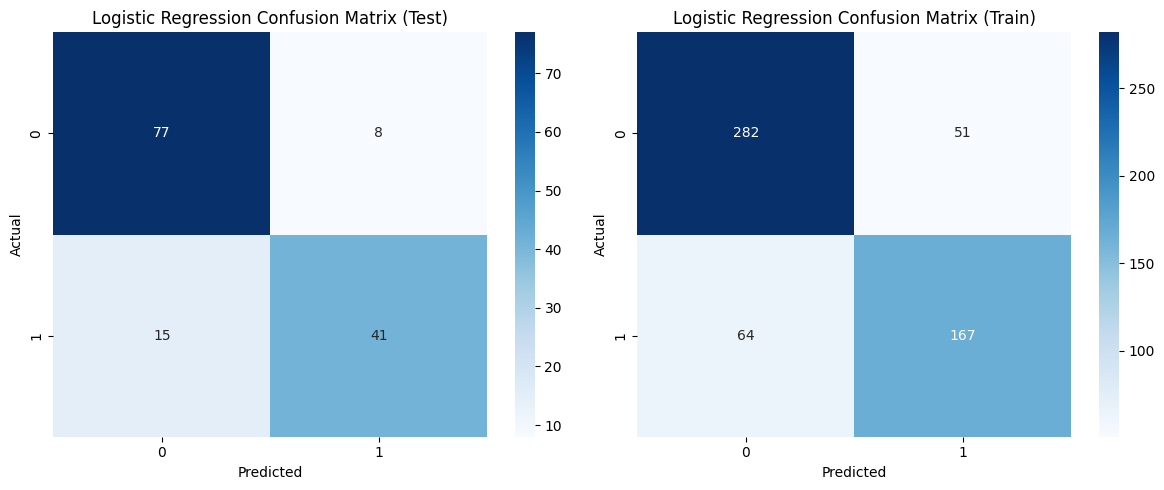

In [ ]:
# @title
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrices
cm_test_LG = confusion_matrix(y_test_LG, y_predict_test_LG)
cm_train_LG = confusion_matrix(y_train_LG, y_predict_train_LG)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Change to 1 row, 2 columns

# Plot confusion matrix for Logistic Regression (Test)
sns.heatmap(cm_test_LG, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix (Test)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot confusion matrix for Logistic Regression (Train)
sns.heatmap(cm_train_LG, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix (Train)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()